## Step 1: Import Libraries and Load Dataset

In [4]:
# import required Libraries

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd
import numpy as no
import tensorflow as tf
print ("TensorFlow version: ", tf.__version__)
# first neural network with keras tutorial
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

TensorFlow version:  2.17.1


In [5]:
data = pd.read_csv('loan_data.csv')
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
#check data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [8]:
data.isna().sum()

,0
credit.policy,0
purpose,0
int.rate,0
installment,0
log.annual.inc,0
dti,0
fico,0
days.with.cr.line,0
revol.bal,0
revol.util,0


## Step 2: Feature Transformation

Feature Transformation and Intial Analysis

In [9]:
# Check for missing value
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


In [12]:
#Transform categorical values into numerical values (discrete)
le = LabelEncoder()
data['purpose'] = le.fit_transform(data['purpose'])

In [11]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Step 3: Exploratory Data Analysis (EDA)

 Exploratory data analysis of different factors in the dataset.

1. Visualize the distribution of the target variable (`not.fully.paid`) to check class imbalance.

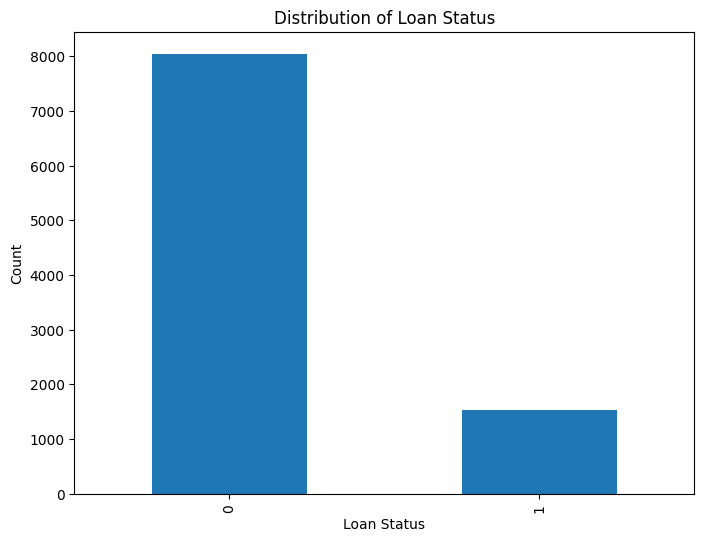

In [15]:
# Distribution of target variable ( Loan Default)
plt.figure(figsize=(8, 6))
data['not.fully.paid'].value_counts().plot(kind='bar')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

2. Plot a correlation heatmap to understand relationships between features.

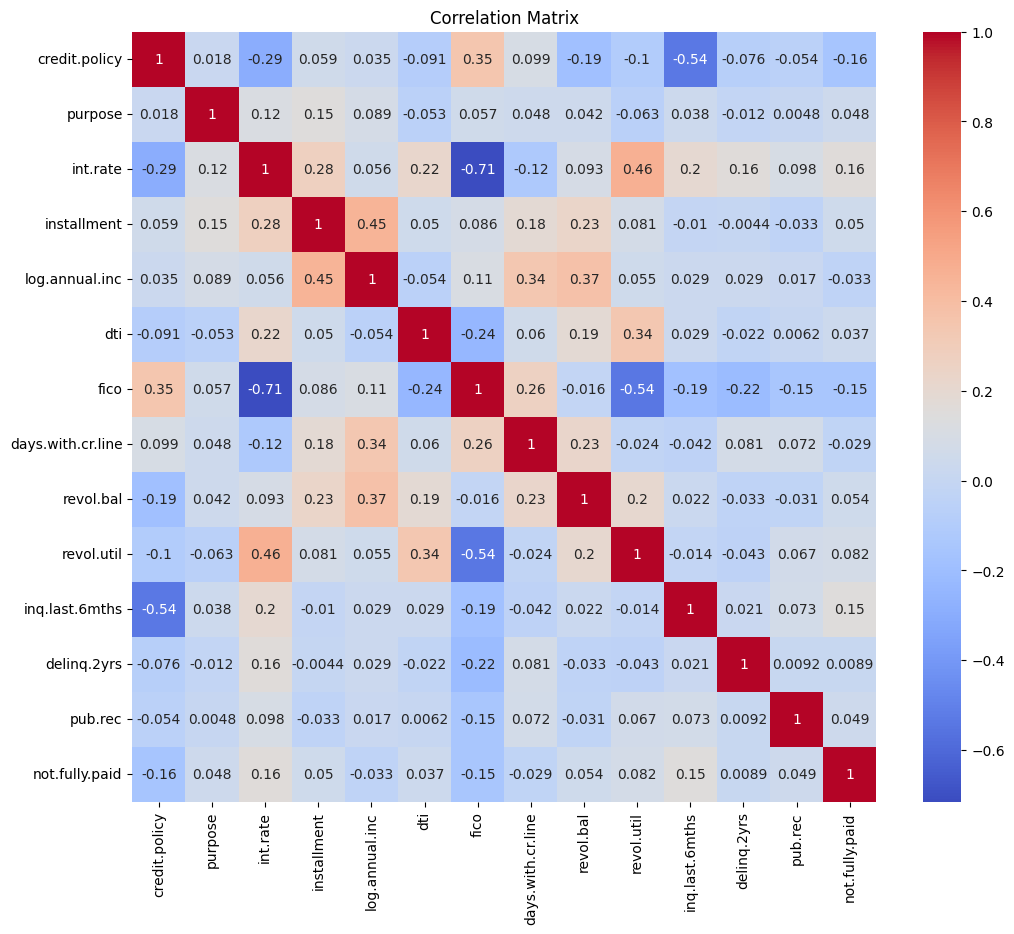

In [18]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

3. Identify potential multicollinearity between features.

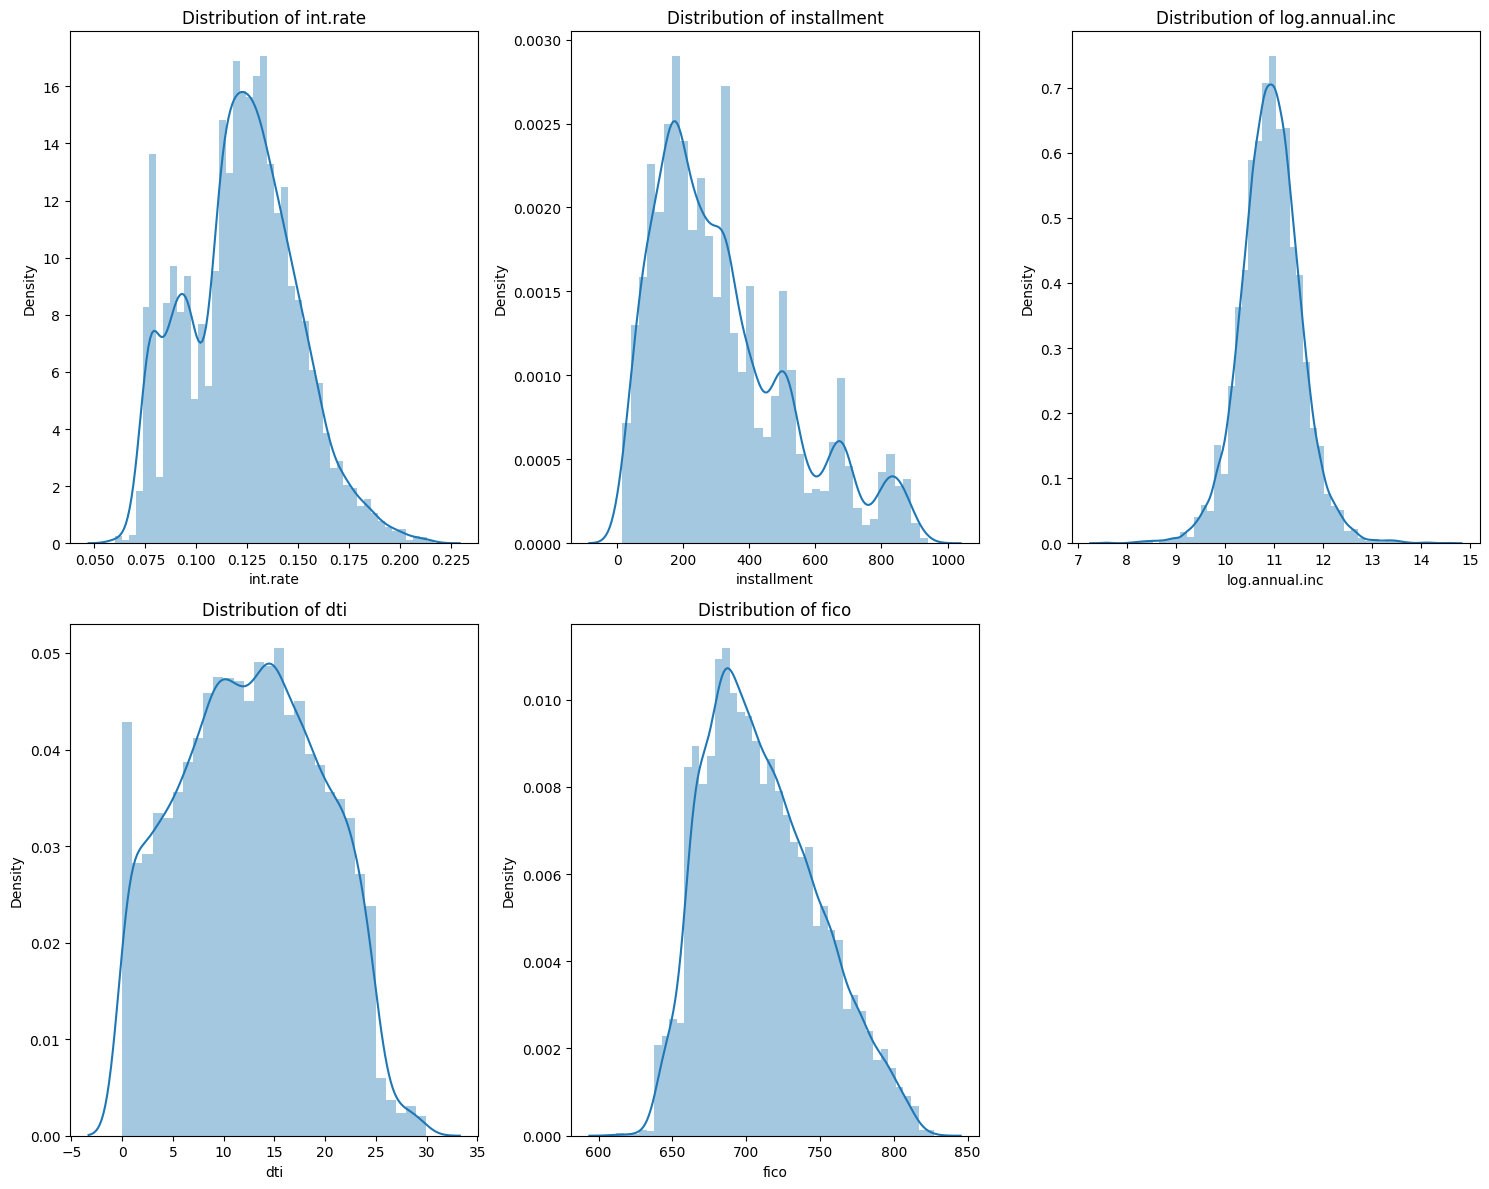

In [14]:
# Create a visualization from numerical features
numerical_features = ['int.rate','installment', 'log.annual.inc', 'dti', 'fico']
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_features, 1):
  plt.subplot(2, 3, i)
  sns.distplot(data[col])
  plt.title(f'Distribution of {col}')
plt.tight_layout()


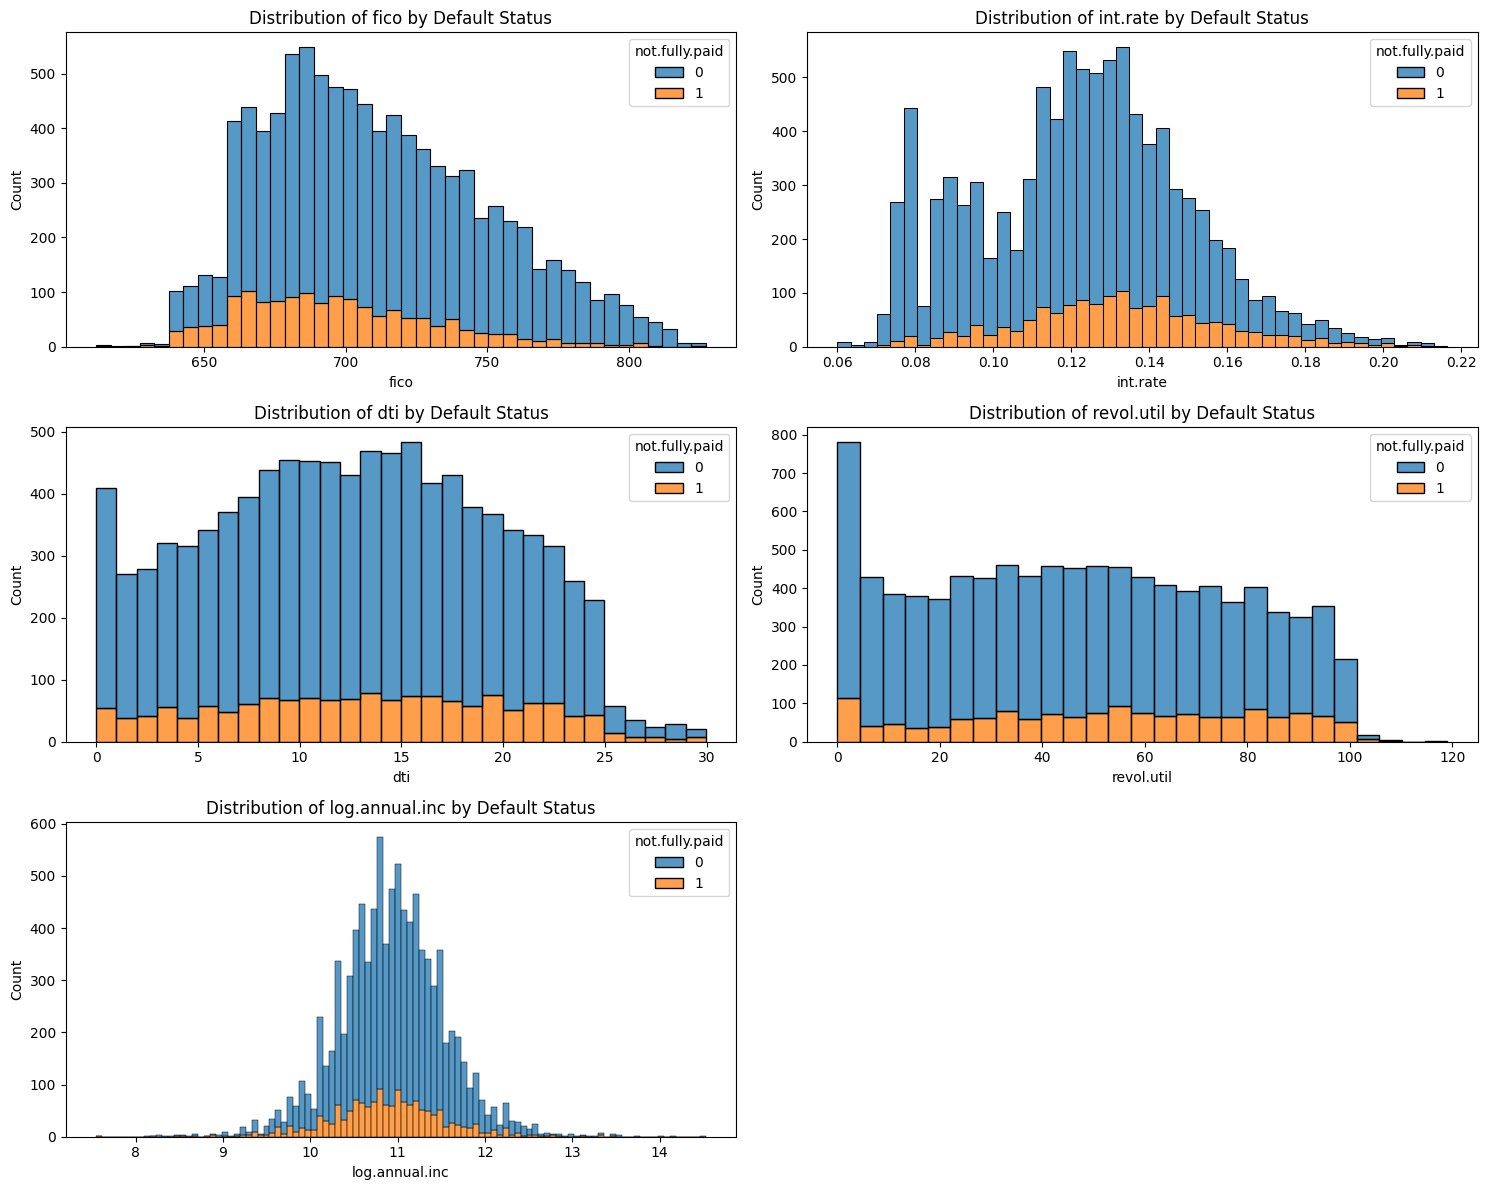

In [16]:
# Plot distributions for important features
features = ['fico', 'int.rate', 'dti', 'revol.util', 'log.annual.inc']
plt.figure(figsize=(15,12))
for i, col in enumerate(features):
    plt.subplot(3,2,i+1)
    sns.histplot(data=data, x=col, hue='not.fully.paid', multiple="stack")
    plt.title(f'Distribution of {col} by Default Status')
plt.tight_layout()
plt.show()

log.annual.inc: The natural log of the self-reported annual income of the borrower

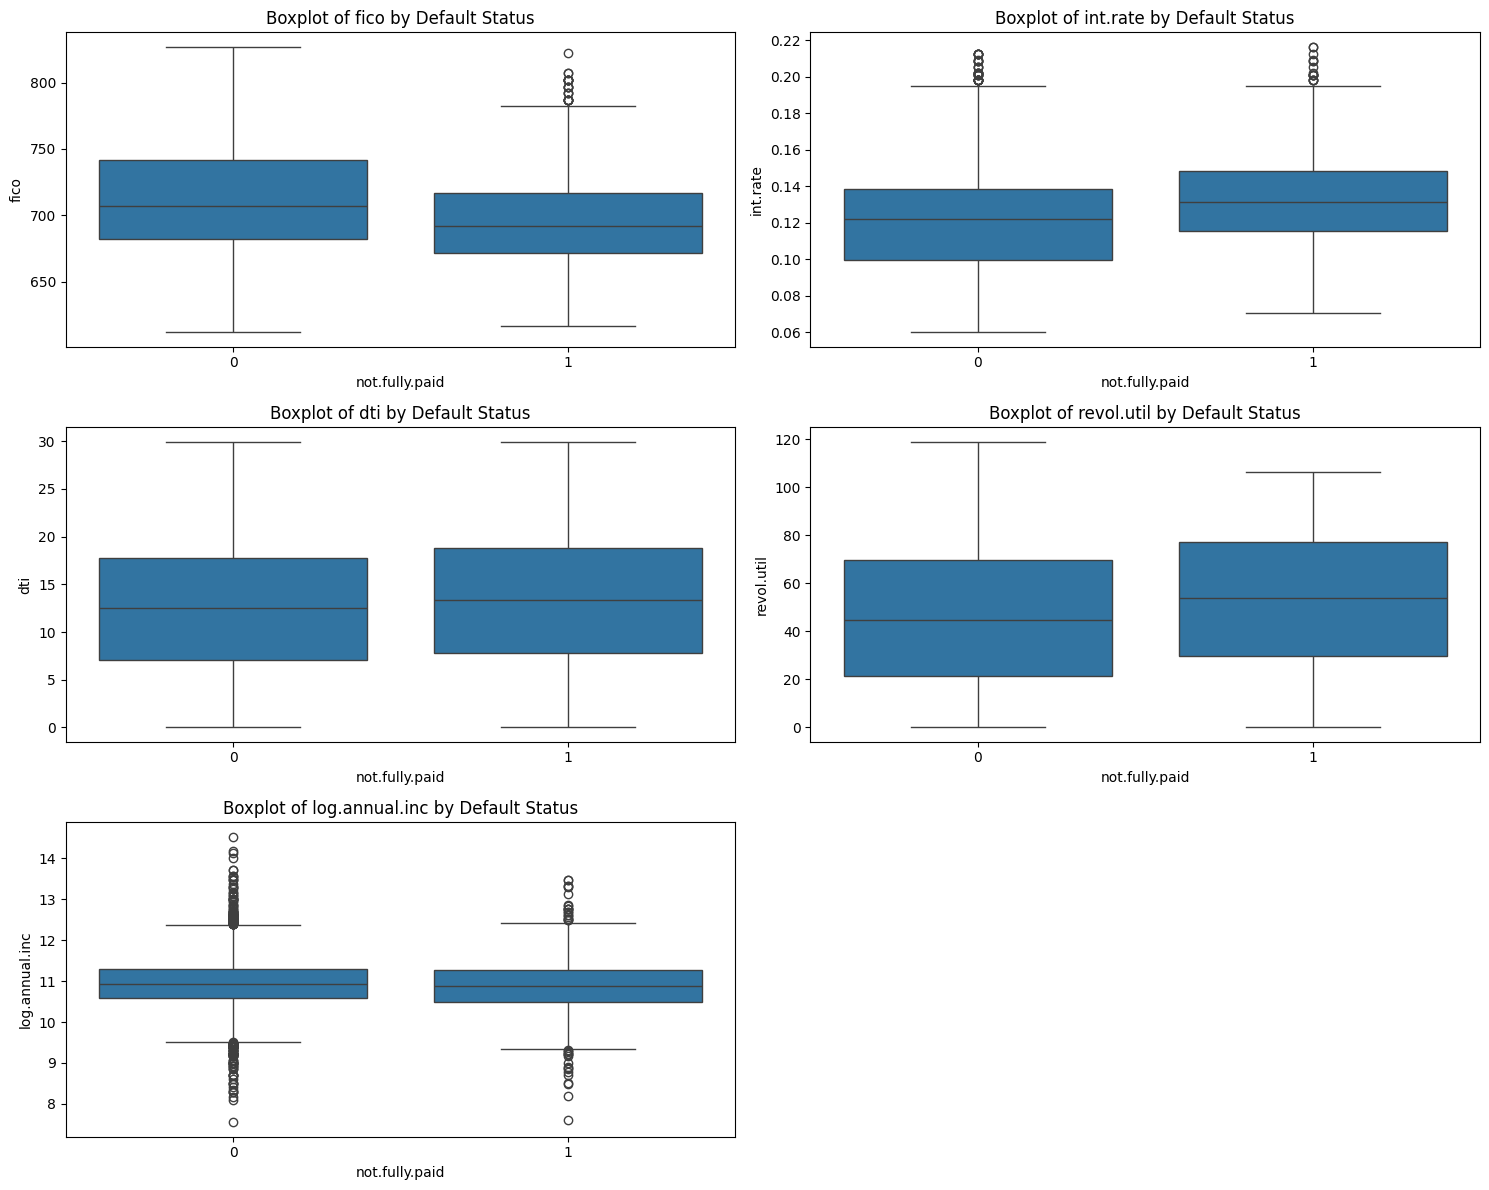

In [19]:
# Boxplot of Key Features
plt.figure(figsize=(15,12))
for i, col in enumerate(features):
  plt.subplot(3,2,i+1)
  sns.boxplot(x='not.fully.paid', y=col, data=data)
  plt.title(f'Boxplot of {col} by Default Status')
plt.tight_layout()

## Step 4: Additional Feature Engineering

1. Create interaction features:
   - `fico_income`: Multiply FICO score by annual income.
   - `dti_income`: Multiply debt-to-income ratio by annual income.

2. Add these interaction features to both training and testing datasets.

3. Compute a correlation matrix.

4. Identify features with high correlation (e.g., correlation > 0.8) and drop them.


In [20]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [25]:
# 1. Create interaction features:
data['fico_income'] = data['fico'] * data['log.annual.inc']
data['dti_income'] = data['dti'] * data['log.annual.inc']

In [28]:
# 2. Add these interaction features to both training and testing datasets.
X = data.drop('not.fully.paid', axis=1)
y =  data['not.fully.paid']

In [27]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


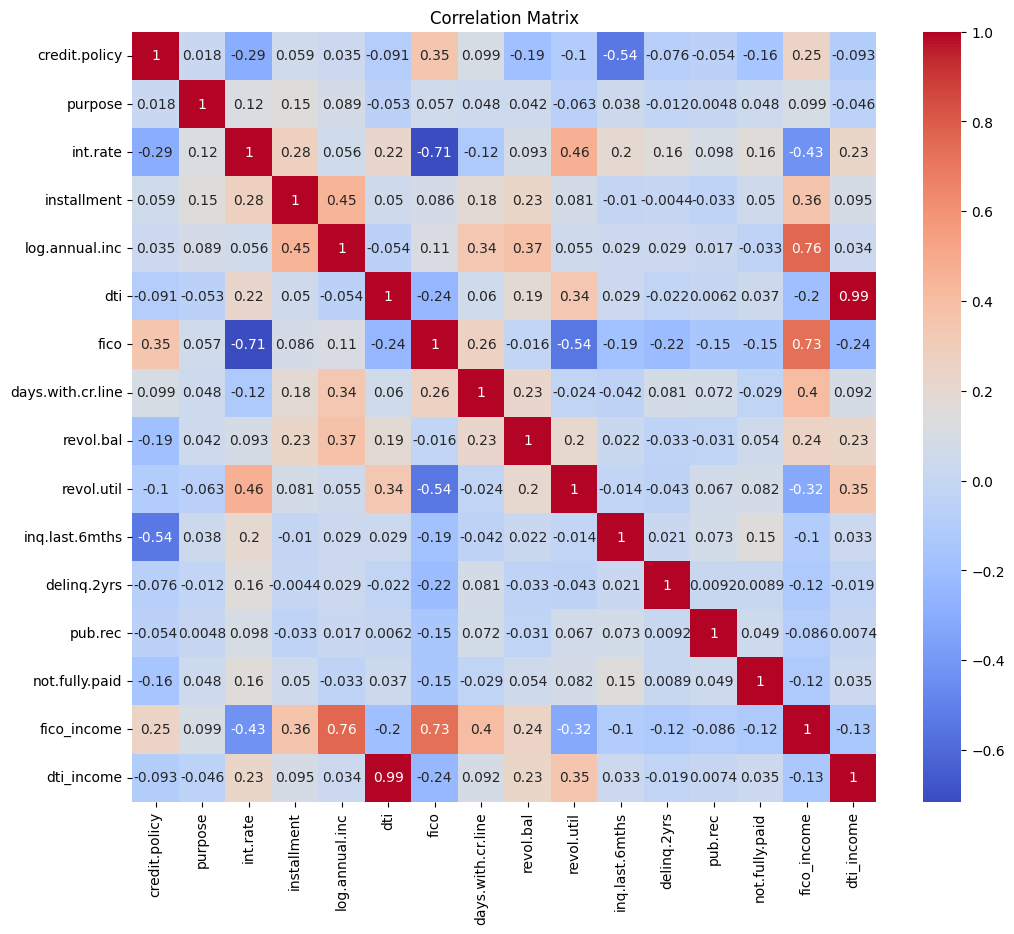

In [24]:
# 3. Compute a correlation matrix.
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [30]:
# 4. Identify features with high correlation (e.g., correlation > 0.8) and drop them.
# Compute the correlation matrix
correlation_matrix = data.corr()
correlation_matrix

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,fico_income,dti_income
credit.policy,1.000000,0.017569,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119,0.248562,-0.092664
purpose,0.017569,1.000000,0.117067,0.154827,0.088958,-0.053279,0.057337,0.047526,0.042364,-0.062947,0.037516,-0.011701,0.004793,0.047907,0.098953,-0.045943
int.rate,-0.294089,0.117067,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552,-0.428110,0.229820
installment,0.058770,0.154827,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955,0.362830,0.094657
log.annual.inc,0.034906,0.088958,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439,0.760138,0.034167
dti,-0.090901,-0.053279,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362,-0.197936,0.994444
fico,0.348319,0.057337,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666,0.731504,-0.235692
days.with.cr.line,0.099026,0.047526,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237,0.401640,0.092397
revol.bal,-0.187518,0.042364,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699,0.243387,0.233414
revol.util,-0.104095,-0.062947,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088,-0.317224,0.346116


In [54]:
import numpy as np  # Import NumPy directly
# Create a mask to identify pairs of features with high correlation
# (correlation > 0.8 or < -0.8)
high_corr_pairs = correlation_matrix > 0.8
high_corr_pairs = high_corr_pairs.where(~np.eye(high_corr_pairs.shape[0], dtype=bool))
high_corr_pairs

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,fico_income,dti_income
credit.policy,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
purpose,False,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False
int.rate,False,False,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False
installment,False,False,False,NaN,False,False,False,False,False,False,False,False,False,False,False,False
log.annual.inc,False,False,False,False,NaN,False,False,False,False,False,False,False,False,False,False,False
dti,False,False,False,False,False,NaN,False,False,False,False,False,False,False,False,False,True
fico,False,False,False,False,False,False,NaN,False,False,False,False,False,False,False,False,False
days.with.cr.line,False,False,False,False,False,False,False,NaN,False,False,False,False,False,False,False,False
revol.bal,False,False,False,False,False,False,False,False,NaN,False,False,False,False,False,False,False
revol.util,False,False,False,False,False,False,False,False,False,NaN,False,False,False,False,False,False


In [55]:
# Find columns to drop
columns_to_drop = ['dti','dti_income']

In [56]:
columns_to_drop

['dti', 'dti_income']

In [48]:
data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'fico_income', 'dti_income'],
      dtype='object')

In [57]:
# Drop the columns
df_dropped = data.drop(columns=columns_to_drop)

print("Original DataFrame:")
print(data)
print("\nDataFrame after dropping highly correlated features:")
print(df_dropped)

Original DataFrame:
      credit.policy  purpose  int.rate  installment  log.annual.inc    dti  \
0                 1        2    0.1189       829.10       11.350407  19.48   
1                 1        1    0.1071       228.22       11.082143  14.29   
2                 1        2    0.1357       366.86       10.373491  11.63   
3                 1        2    0.1008       162.34       11.350407   8.10   
4                 1        1    0.1426       102.92       11.299732  14.97   
...             ...      ...       ...          ...             ...    ...   
9573              0        0    0.1461       344.76       12.180755  10.39   
9574              0        0    0.1253       257.70       11.141862   0.21   
9575              0        2    0.1071        97.81       10.596635  13.09   
9576              0        4    0.1600       351.58       10.819778  19.18   
9577              0        2    0.1392       853.43       11.264464  16.28   

      fico  days.with.cr.line  revol.bal  r

In [59]:
df_dropped.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'fico_income'],
      dtype='object')

In [58]:
df_dropped.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,fico_income
0,1,2,0.1189,829.10,11.350407,737,5639.958333,28854,52.1,0,0,0,0,8365.249620
1,1,1,0.1071,228.22,11.082143,707,2760.000000,33623,76.7,0,0,0,0,7835.074783
2,1,2,0.1357,366.86,10.373491,682,4710.000000,3511,25.6,1,0,0,0,7074.720985
3,1,2,0.1008,162.34,11.350407,712,2699.958333,33667,73.2,1,0,0,0,8081.489456
4,1,1,0.1426,102.92,11.299732,667,4066.000000,4740,39.5,0,1,0,0,7536.921404


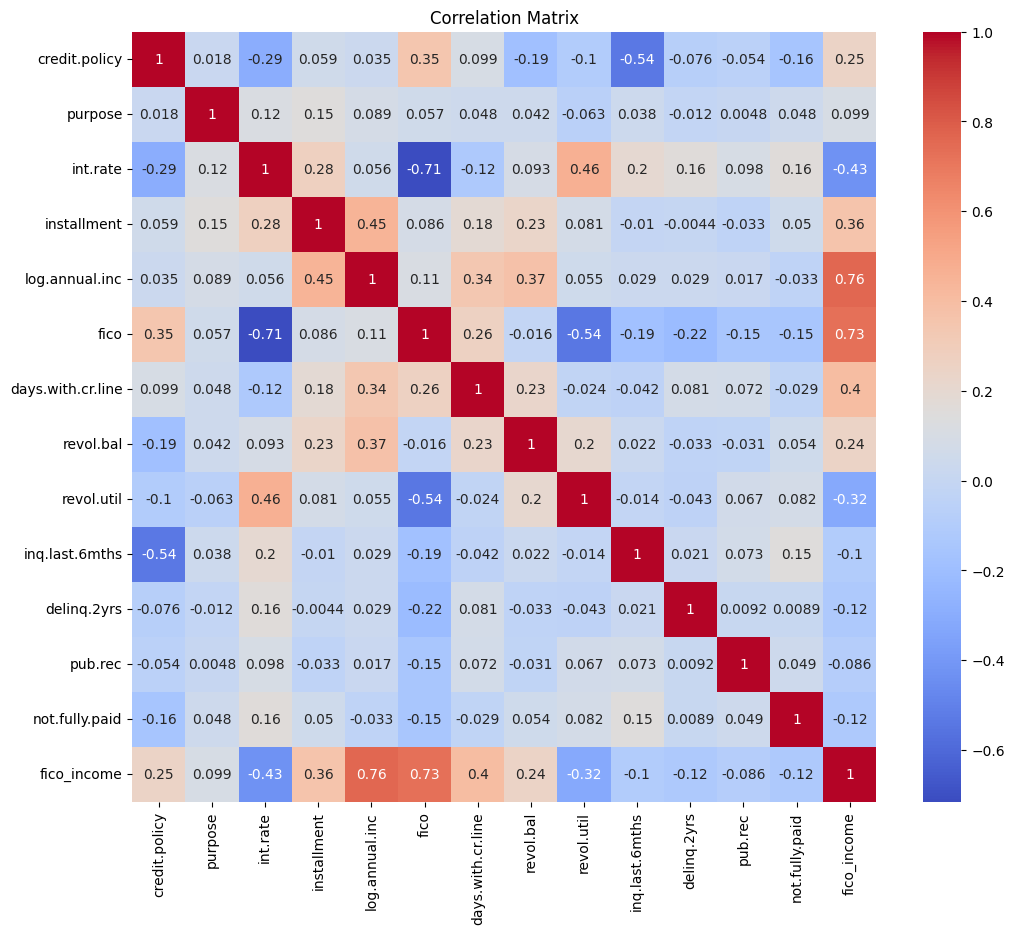

In [61]:
# 3. Compute a correlation matrix.
correlation_matrix = df_dropped.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [62]:
X = df_dropped.drop('not.fully.paid', axis=1)
y =  df_dropped['not.fully.paid']


In [63]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 5: Build and Compile the Deep Learning Model

1. Initialize a Sequential model.
2. Add input, hidden, and output layers:
   - Input Layer: Dense layer with ReLU activation.
   - Hidden Layers: Add additional Dense layers with Dropout for regularization.
   - Output Layer: Dense layer with sigmoid activation for binary classification.
3. Compile the model:
   - Use `adam` optimizer.
   - Set `binary_crossentropy` as the loss function.
   - Add `accuracy` as a metric.

In [84]:
# 1. Initialize a Sequential model.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
X_train.shape

(7662, 13)

In [86]:
# Build the Model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [87]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
# 3. Compile the model:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Step 6: Handle Class Imbalance

1. Compute class weights based on the proportion of each class in the target variable.

In [92]:
from sklearn.utils.class_weight import compute_class_weight

# Ensure y_train is a NumPy array
y_train = np.array(y_train)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Map weights to a dictionary
class_weights_dict = dict(zip(np.unique(y_train), class_weights))
print("Class Weights Dictionary:", class_weights_dict)

# Ensure unique classes match weights
print("Unique Classes in y_train:", np.unique(y_train))

Class Weights Dictionary: {0: 0.5954305253341623, 1: 3.1197068403908794}
Unique Classes in y_train: [0 1]


## Step 7: Train the Model

1. Train the model using the training dataset:
   - Specify epochs, batch size, and validation split.
   - Pass class weights to handle imbalance.
   
2. Monitor the training and validation loss and accuracy during training.

In [93]:
# Add early stoping (in case there is no improvement to not run run useless)
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [94]:
# Train the model with class weights
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights_dict,  # Pass class weights here
    callbacks=[early_stop]
)

Epoch 1/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5833 - loss: 0.6794 - val_accuracy: 0.6177 - val_loss: 0.6585
Epoch 2/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6193 - loss: 0.6433 - val_accuracy: 0.6569 - val_loss: 0.6247
Epoch 3/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6255 - loss: 0.6335 - val_accuracy: 0.6667 - val_loss: 0.6223
Epoch 4/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6163 - loss: 0.6395 - val_accuracy: 0.6419 - val_loss: 0.6179
Epoch 5/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6379 - loss: 0.6255 - val_accuracy: 0.6888 - val_loss: 0.5984
Epoch 6/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6503 - loss: 0.6322 - val_accuracy: 0.6445 - val_loss: 0.6263
Epoch 7/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6413 - loss: 0.6121 - val_accuracy: 0.6301 - val_loss: 0.6554
Epoch 8/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6298 - loss: 0.6142 - val_accuracy: 0.

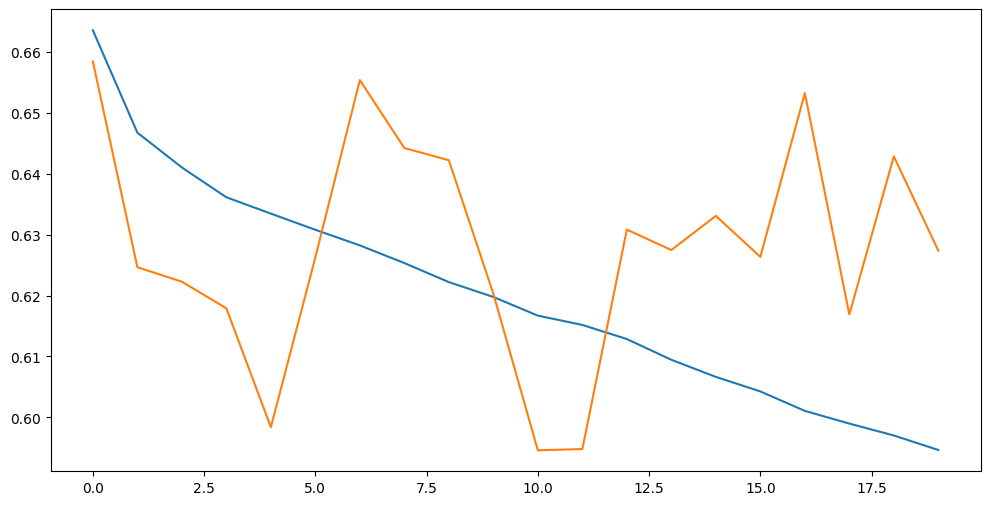

In [98]:
# Plot training history
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

## Step 8: Evaluate the Model
1. Evaluate the model on the test dataset.
2. Print the test accuracy.

In [97]:
X_test.shape

(1916, 13)

In [106]:
# Evaluate the model

# Ensure y_test is a 1D array
y_test = np.array(y_test).flatten()
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Test Loss: 0.6312813758850098
Test Accuracy: 0.6466597318649292


In [108]:
# Get Prediction
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int). reshape(-1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [109]:
# Print Confusion Matrix
print(cm)

[[1054  557]
 [ 120  185]]


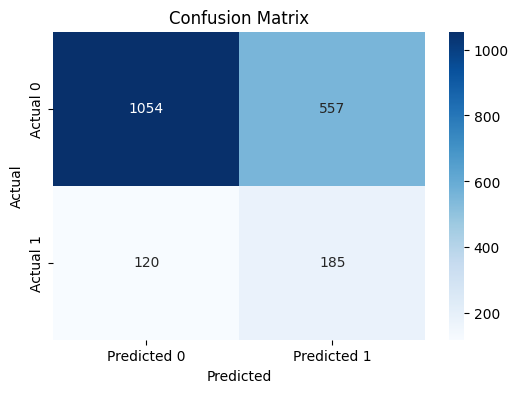

In [111]:
# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Step 9: Visualize Results
1. Plot training and validation loss over epochs.
2. Plot training and validation accuracy over epochs.

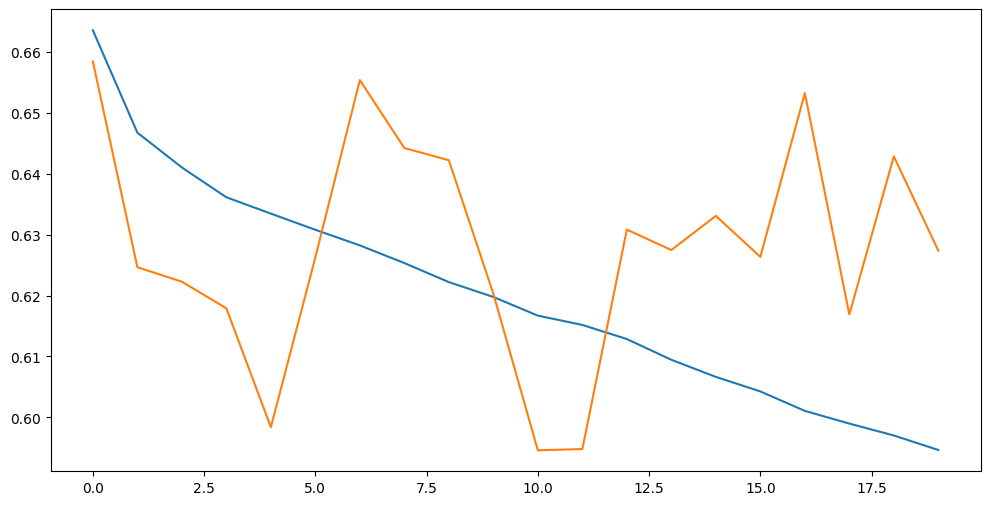

In [101]:
# 1. Plot training and validation loss over epochs.
# Plot training history
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

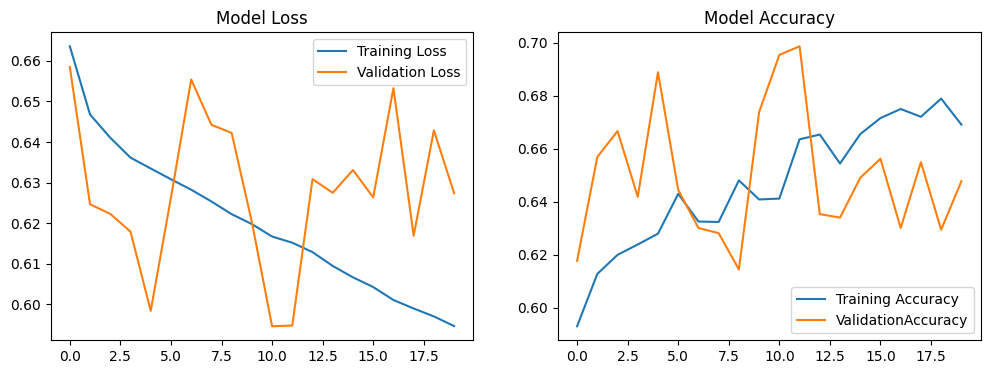

In [102]:
# 2. Plot training and validation accuracy over epochs.
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='ValidationAccuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()